In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#yolcu sayısına göre ve uçus sayısına göre clustring

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [4]:
df.sample(4)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
6152,200911,TACA,TA,TACA,TA,International,Central America,Deplaned,Other,International,A,3582
12104,201403,SkyWest Airlines,OO,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 1,B,102569
16139,201612,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,142414
15974,201611,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Other,International,A,56961


In [5]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [6]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [7]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [8]:
#Published Airline IATA Code null alanlar temizlendi
bool_series = pd.notnull(df["Published Airline IATA Code"])
df=df[bool_series]

In [9]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [10]:
    df.sample(2)

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year
3492,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,International,A,11883,1,2008
2010,Midwest Airlines,YX,Midwest Airlines,YX,Domestic,US,Enplaned,Other,Terminal 3,E,3579,12,2006


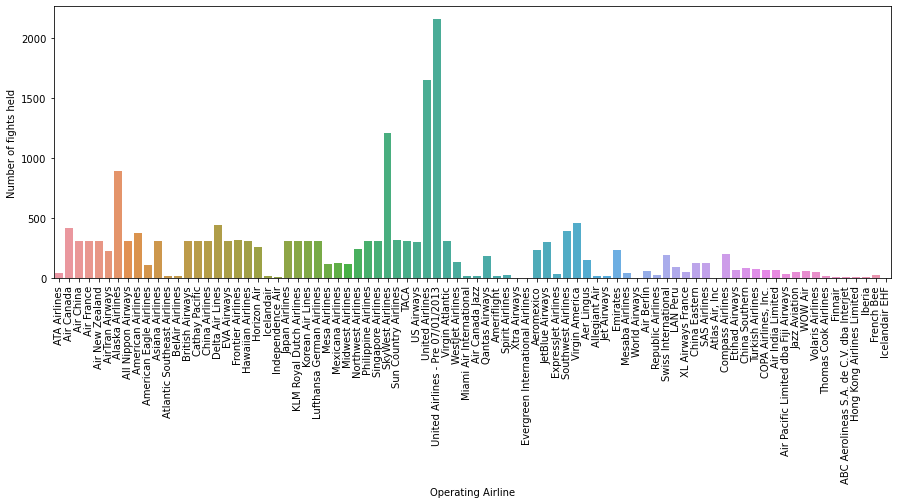

In [11]:
plt.figure(figsize=(15,5))
sns.countplot("Operating Airline",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of fights held");

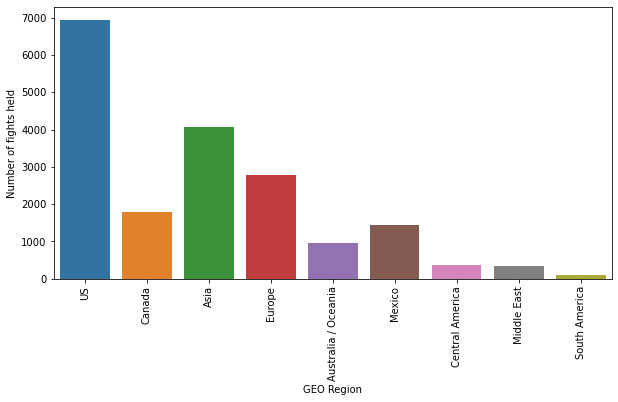

In [12]:
plt.figure(figsize=(10,5))
sns.countplot("GEO Region",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of fights held");

In [13]:
airline_count = df["Operating Airline"].value_counts() #Hava yolu şirketlerinin kaç defa uçuş yaptıkları

In [14]:
airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False) #Hava yolu şirketleri ile uçan yolcu sayıları

In [15]:
list_group=pd.DataFrame(airline_passenger_count)
list_group.head(10)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


Text(0.5, 1.0, 'Hava yolu şirketlerinin taşıdığı yolcu sayıları')

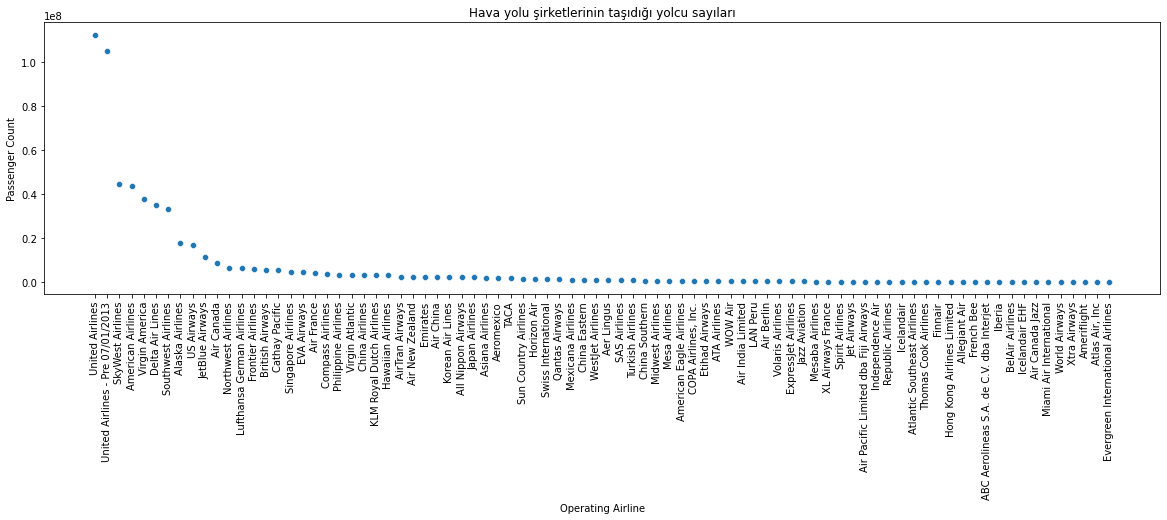

In [16]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Hava yolu şirketlerinin taşıdığı yolcu sayıları")

In [17]:
airline_passenger_count_of_year=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False) #Hava yolu şirketleri ile uçan yolcu sayılarıcount2

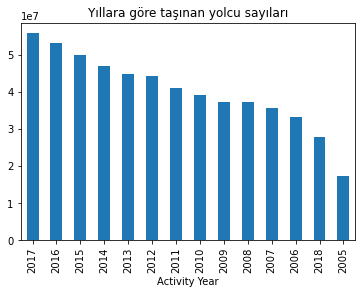

In [18]:
airline_passenger_count_of_year.plot.bar()
plt.title("Yıllara göre taşınan yolcu sayıları");

In [19]:
x=pd.get_dummies(df,drop_first=True)

In [20]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}")        

In [21]:
cluster(15)

cluster=2, score=0.8593932399348594
cluster=3, score=0.828382486917623
cluster=4, score=0.7862465053066837
cluster=5, score=0.7844844300731962
cluster=6, score=0.6616371270456082
cluster=7, score=0.6621603937620619
cluster=8, score=0.6501217113249247
cluster=9, score=0.6404259674956255
cluster=10, score=0.6149921864110253
cluster=11, score=0.6113765801193545
cluster=12, score=0.6113202832359752
cluster=13, score=0.532329689564887
cluster=14, score=0.5320296625151681


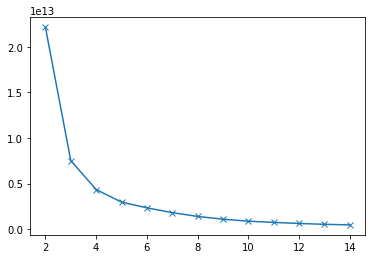

In [22]:
plt.plot(all_clusters,sum_of_squared_distances,marker="x")

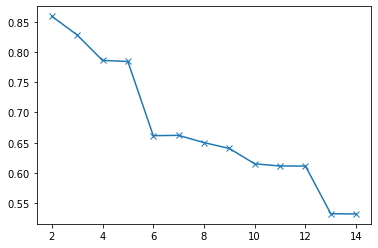

In [23]:
plt.plot(all_clusters,all_score,marker="x")  # 5.gruptan sonra düşüş başlamış ve ortalama olarak benzer sayılar çıktığı için 5 gruba ayırdım

No handles with labels found to put in legend.


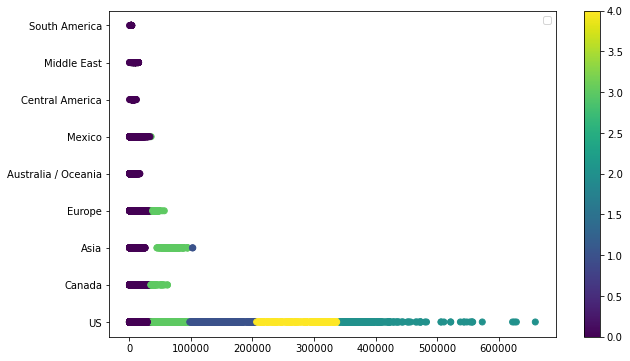

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df["Passenger Count"],y=df["GEO Region"],c=predicts[3])
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


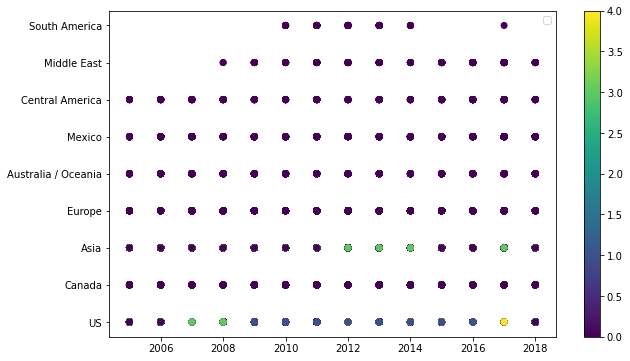

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df["Activity Year"],y=df["GEO Region"],c=predicts[3])
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


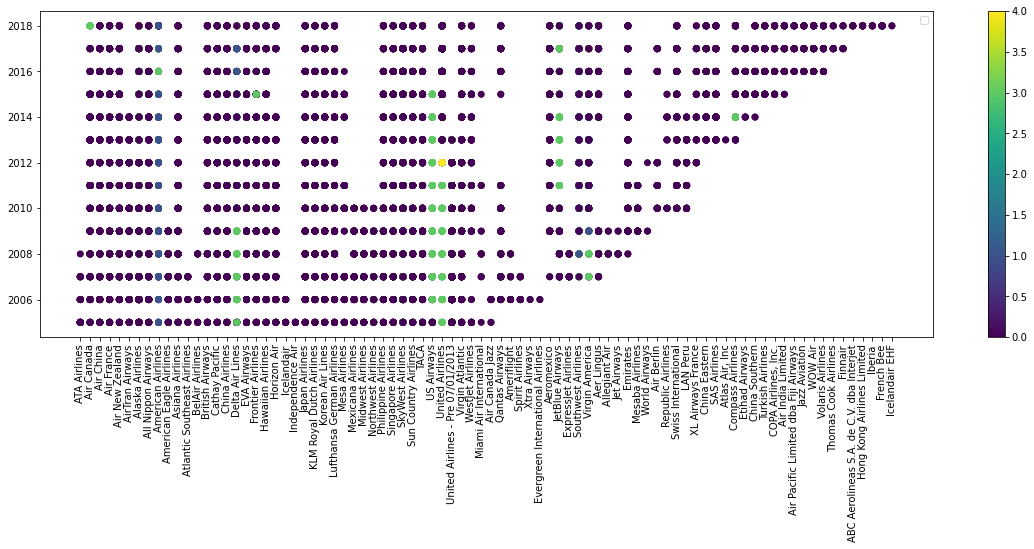

In [26]:
plt.figure(figsize=(20,6))
plt.scatter(y=df["Activity Year"],x=df["Operating Airline"],c=predicts[3])
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()

No handles with labels found to put in legend.


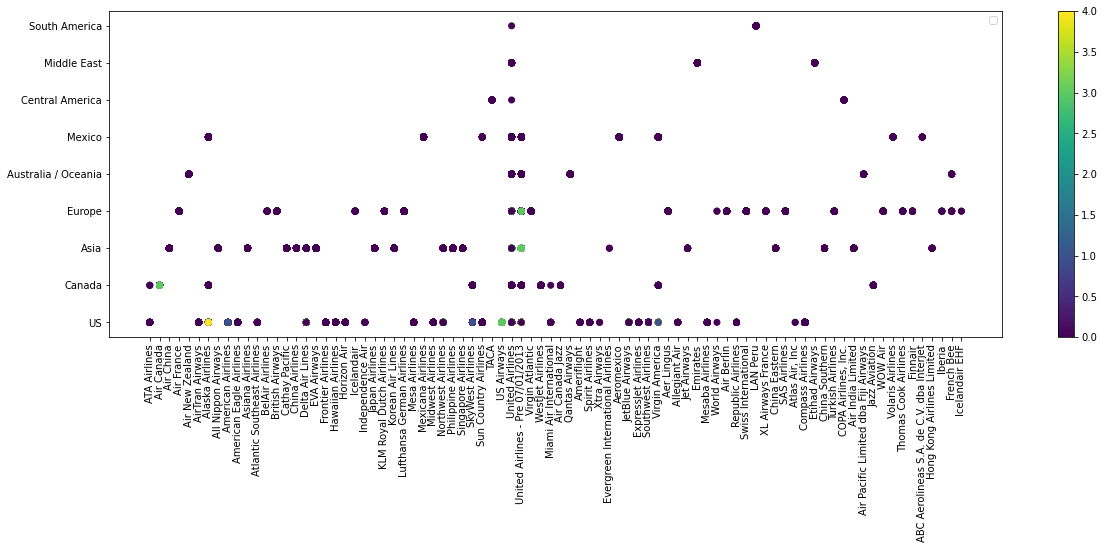

In [27]:
plt.figure(figsize=(20,6))
plt.scatter(x=df["Operating Airline"],y=df["GEO Region"],c=predicts[3])
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()